In [3]:
import pandas as pd
from fbprophet import Prophet
from DatenSammlung import DatenVergangenheitHolen, FeiertageHolen
from DatenVerarbeitung import DatenVerarbeitung

In [4]:
df = DatenVerarbeitung()

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.
100%|██████████| 1/1 [00:01<00:00,  1.80s/it]
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df_test = df

In [17]:
df_test= df_test.rename(columns={"7TIW": "y"})
df_test = df_test.reset_index()
df_test= df_test.rename(columns={"Date": "ds"})

In [14]:
df_test

,index,DS,Y,Temperatur,ResNbg
0,0,2020-04-02,33.181253,4.7,76.85
1,1,2020-04-03,36.846624,5.7,76.85
2,2,2020-04-04,36.267881,8.0,76.85
3,3,2020-04-05,35.303309,10.9,76.85
4,4,2020-04-06,36.460795,10.9,76.85
...,...,...,...,...,...
323,323,2021-03-15,127.709240,3.9,77.78
324,324,2021-03-16,142.370723,3.3,77.78
325,325,2021-03-17,145.843180,1.5,77.78
326,326,2021-03-18,149.894379,1.5,77.78


In [18]:
m = Prophet()
m.add_country_holidays(country_name='DE')
m.fit(df_test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
330,2021-03-22
331,2021-03-23
332,2021-03-24
333,2021-03-25
334,2021-03-26


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
330,2021-03-22,30.333047,-17.067137,83.060748
331,2021-03-23,28.700882,-20.435325,74.757320
332,2021-03-24,23.740211,-27.094271,72.977050
333,2021-03-25,22.346676,-25.564619,72.856984
334,2021-03-26,16.867737,-32.367796,64.446053


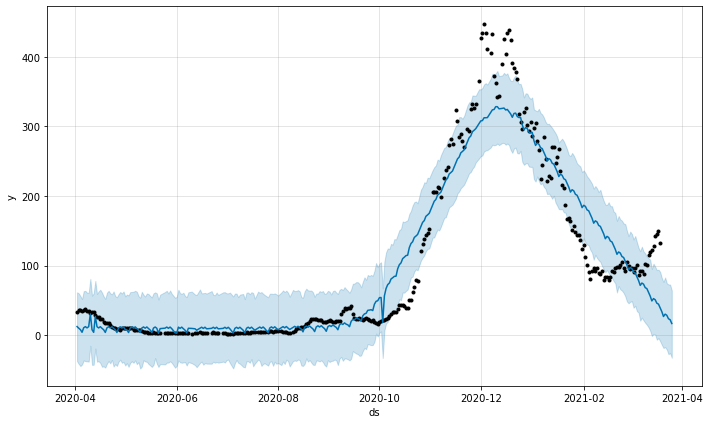

In [31]:
fig1 = m.plot(forecast)

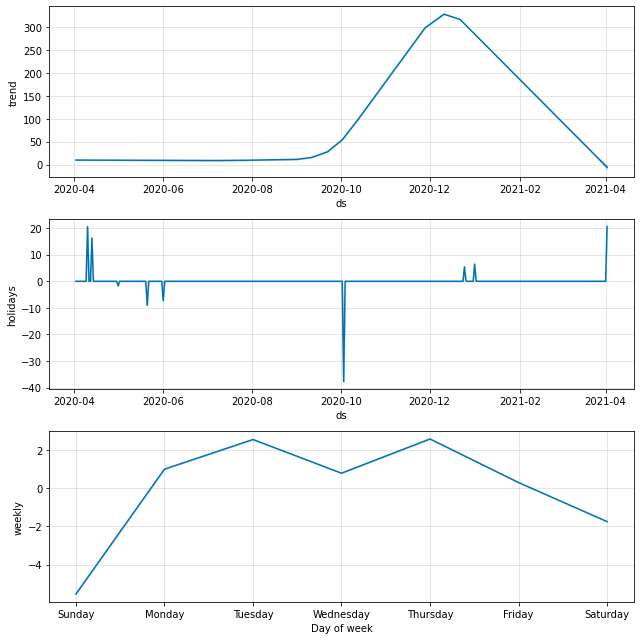

In [24]:
fig2 = m.plot_components(forecast)